In [17]:
# Ques. Write a program to demonstrate the effect of ringing effect in an image
# by using a low pass filter. 
# Demonstrate how ringing effect can be avoided if LPF has to be used.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("smooth.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h,w = img.shape[0],img.shape[1]

filter1 = np.zeros((h,w), dtype = np.uint8)

plt.imshow(img, cmap = 'gray')


In [2]:
# Ideal Low pass Filter 
filter1 = cv2.circle(filter1, (h//2,w//2), 10, 255, -1)

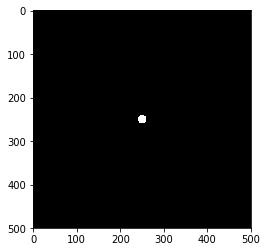

In [3]:
plt.imshow(filter1, cmap = 'gray')

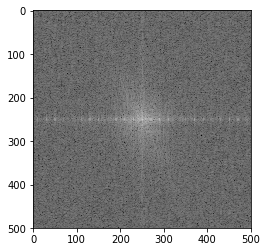

In [4]:
# Fourier Transform of input image
img2_fft = np.fft.fftshift(np.fft.fft2(img))

magnitude_spectrum1 = 20*np.log(1+np.abs(img2_fft))

plt.imshow((magnitude_spectrum1), cmap = "gray")

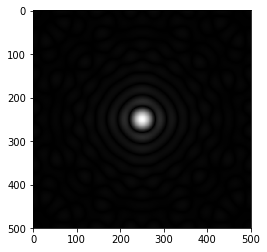

In [5]:
# Inverse fourier transfor of filter to show ringing effect in spatial domain
img_fft = np.fft.ifftshift(np.fft.ifft2(filter1))

magnitude_spectrum1 = 20*np.log(1+np.abs(img_fft))

plt.imshow((magnitude_spectrum1), cmap = "gray")

In [6]:
# multiplying image with ideal LPF in frequency domain
ans = np.multiply(img2_fft, filter1)

In [7]:
# inverse fourier transform of image
ans = np.fft.ifft2(np.fft.ifftshift(ans))

In [8]:
ans = np.abs(ans)

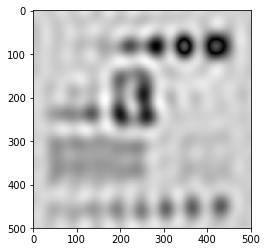

In [9]:
# ringing effect using Ideal LPF

plt.imshow(ans, cmap = 'gray')


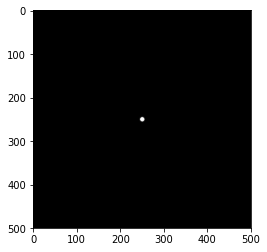

In [10]:
# Creating a butterworth filter with radius 5 and order 5

D0 = 5
n=5
# h,w = 5,5
butterworth = np.ones((h,w))
for i in range(h):
    for j in range(w):
        butterworth[i][j] = np.sqrt((i-(h//2))**2+(j-(w//2))**2)

# print(butterworth)
for i in range(h):
    for j in range(w):
        butterworth[i][j] = 1/(1+(butterworth[i][j]/D0)**(2*n))

plt.imshow(butterworth, cmap = "gray")


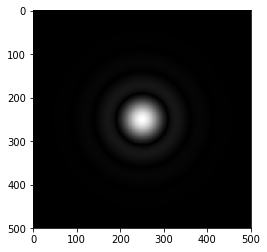

In [11]:
# Displaying Butterworth filter in spatial domain

img1_fft = np.fft.ifftshift(np.fft.ifft2(butterworth))
# filter_fft = np.fft.fftshift(np.fft.fft2(filter1))

magnitude_spectrum2 = 20*np.log(1+np.abs(img1_fft))

plt.imshow((magnitude_spectrum2), cmap = "gray")

In [12]:
# Multiplying image with butterworth filter in frequency domain

img_filter = np.multiply(img2_fft, butterworth)


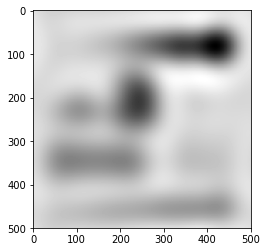

In [13]:
# Ringing effect using Butterworth Filter

ans = np.fft.ifft2(np.fft.ifftshift(img_filter))
ans = np.abs(ans)
plt.imshow(ans, cmap = 'gray')


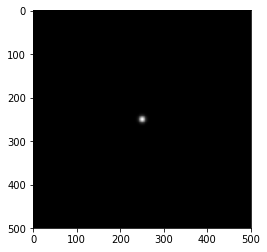

In [14]:
# Creating a gaussian filter with radius 5 

D0 = 5

gaussian = np.ones((h,w))
for i in range(h):
    for j in range(w):
        gaussian[i][j] = np.sqrt((i-(h//2))**2+(j-(w//2))**2)
        
for i in range(h):
    for j in range(w):
        gaussian[i][j] = np.exp(-(gaussian[i][j])**2/(2*(D0**2)))

plt.imshow(gaussian, cmap = "gray")

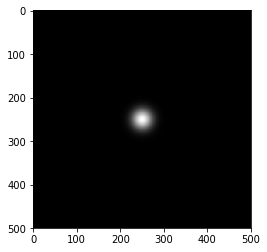

In [15]:
# Displaying Gaussian filter in spatial domain

img1_fft = np.fft.ifftshift(np.fft.ifft2(gaussian))
# filter_fft = np.fft.fftshift(np.fft.fft2(filter1))

magnitude_spectrum2 = 20*np.log(1+np.abs(img1_fft))

plt.imshow((magnitude_spectrum2), cmap = "gray")

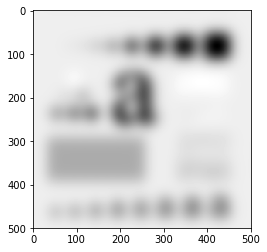

In [16]:
# Multiplying image with gaussian filter in frequency domain

img_filter = np.multiply(img2_fft, gaussian)
ans = np.fft.ifft2(np.fft.ifftshift(img_filter))
ans = np.abs(ans)
plt.imshow(ans, cmap = 'gray')

In [18]:
# Conclusion
# Ringing effect is seen using Ideal Low pass filter. When we transfer Ideal
# Low pass filter in spatial domain ringing effect is seen.
# Also when the input image is multiplied with the filter in frequency domain 
# ringing occurs in it.
# When we use Butterworth LPF if the order is 1 there is no ringing, but as we
# increase the order ringing effect is found.
# To prevent this ringing effect we can use Gaussian LPF. The inverse fourier
# transform of a gaussian image is also a gaussian image.
# Hence, no ringing effect is found when we use Gaussian filter.